In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#minha funcao para mostrar as imagens
def imshow(im,big=False):
    if big:
        plt.figure(figsize=(20,20))
    else:
        plt.figure()
    if len(im.shape)<3:
        plt.imshow(im, cmap='gray')#As cores ficam zoadas no Jupyter se deixar sem esse parâmetro
    else:
        plt.imshow(im[:,:,::-1]) 
    plt.axis('off')
    plt.show()

In [43]:
def f2i(im):#float to int
    return np.round(im * 255.0).astype('uint8')
def i2f(im):#int to float
    return im.astype('float') / 255.0
def norm(im):
    return (im-im.min())/(im.max()-im.min())

### 1. Abrindo Imagem

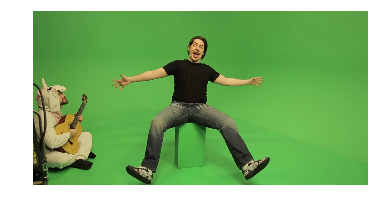

In [63]:
im = cv2.imread("4.bmp")
imshow(im)

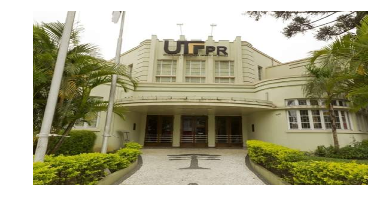

In [64]:
im_fundo = cv2.imread("utfpr.jpg")
im_fundo = cv2.resize(im_fundo, (im.shape[1], im.shape[0]))
imshow(im_fundo)

### 2. Verdes

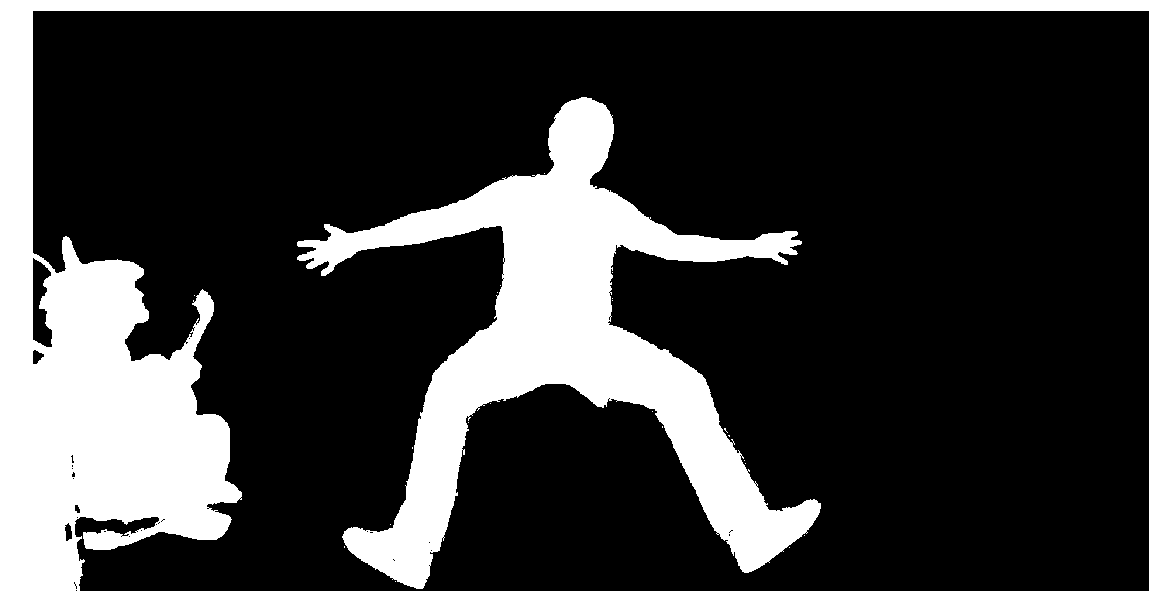

In [66]:
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

eh_verde = (im_hsv[:,:,0] > 40) & (im_hsv[:,:,0] < 75)
bem_saturado = (im_hsv[:,:,1] > 100)
suficientemente_claro = (im_hsv[:,:,2] > 65)

mascara = eh_verde * bem_saturado * suficientemente_claro
mascara = 1 - mascara

imshow(mascara, True)

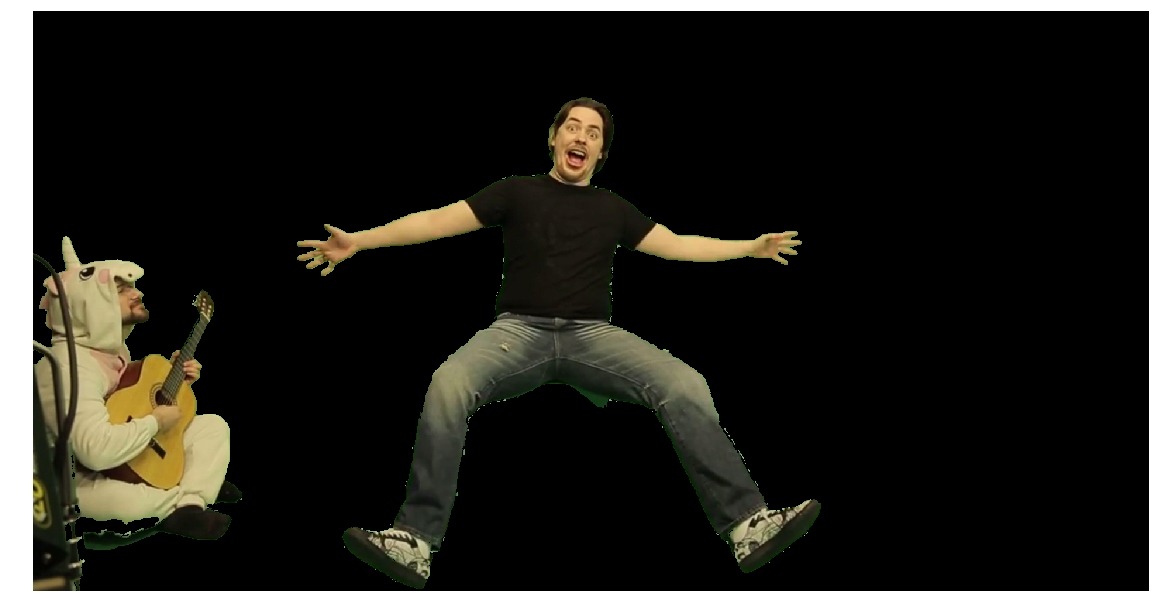

In [68]:
im_hsv_copy = im_hsv.copy()

im_hsv_copy[:,:,2] = im_hsv_copy[:,:,2] * mascara

im_sem_fundo = cv2.cvtColor(im_hsv_copy, cv2.COLOR_HSV2BGR)
imshow(im_sem_fundo, True)

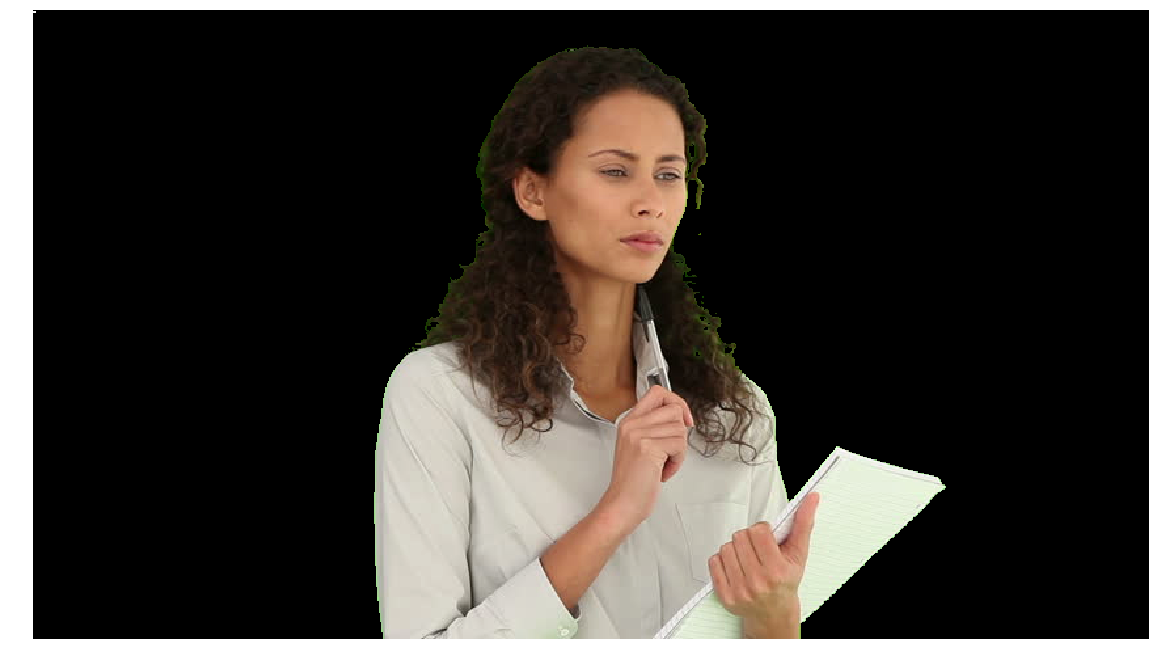

In [61]:
copia_da_imagem_sem_fundo = im_sem_fundo.copy()
mascara2 = 1 - mascara
copia_da_imagem_sem_fundo[mascara2[0],mascara2,:] = im_fundo[mascara2,mascara2,:]
imshow(copia_da_imagem_sem_fundo, True)